In [1]:
from pandas import read_csv, read_excel, Series, concat, wide_to_long
from statistics import mean, median
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from helpers.plots import labels, theme

In [2]:
theme()

## Load cleaned data

In [3]:
g = read_csv('data/cleaned_answers.csv')
g.head(2)

,Unnamed: 0,index,Timestamp,sex,age,place_of_residence,is_polish_scout,scouting_organization,years_in_scouting,is_instructor,...,MIT_tick_jump_score,MIT_waiting_boreliosis_score,MIT_safe_score,MIT_summer_tick_score,MIT_part_tick_score,MIT_city_score,MIT_clock_score,total_score_without_images,total_score_with_images,score_as_percent
0,0,0,2018/04/27 1:36:27 PM GMT+2,Kobieta,17,Miasto powyżej 100 tys. mieszkańców,True,ZHP,11.0,True,...,1,1,1,1,1,1,1,26.2,26.2,90.344828
1,1,1,2018/04/27 1:43:31 PM GMT+2,Kobieta,18,Miasto powyżej 100 tys. mieszkańców,True,ZHP,5.0,True,...,1,1,0,1,1,1,0,22.9,22.9,78.965517


## Demographic statistics

In [4]:
scouts = g[g.is_polish_scout]
not_scouts = g[g.is_polish_scout == False]

In [5]:
h_mean = mean(scouts['total_score_without_images'])
nh_mean = mean(not_scouts['total_score_without_images'])
g_mean = mean(g['total_score_without_images'])
h_mean, nh_mean, g_mean

(23.537135720233138, 22.204674220963174, 22.686833383549263)

In [6]:
g.place_of_residence.value_counts()

Miasto powyżej 100 tys. mieszkańców     1094
Wieś                                    1016
Miasto do 50 tys. mieszkańców            765
Miasto od 50 do 100 tys. mieszkańców     444
Name: place_of_residence, dtype: int64

### Number of valid participants

In [7]:
participants_n = len(g)
participants_n

3319

### Number of women

In [8]:
g.is_women.describe()

count     3319
unique       2
top       True
freq      2650
Name: is_women, dtype: object

In [9]:
len(g[g.is_women])

2650

Majority participants were women

In [10]:
f'{round((len(g[g.is_women])/len(g))*100, 2)}% of participants were women.'

'79.84% of participants were women.'

### Number of scouts

In [11]:
g.is_polish_scout.describe()

count      3319
unique        2
top       False
freq       2118
Name: is_polish_scout, dtype: object

In [12]:
len(g[g.is_polish_scout])

1201

Only about 1/3 of participants were scouts

In [13]:
f'{round((len(g[g.is_polish_scout])/len(g))*100, 2)}% of participants were scouts.'

'36.19% of participants were scouts.'

### Age of participants

In [14]:
f'Mean age of all participants was: {round(mean(g.age), 2)} years.'

'Mean age of all participants was: 18.22 years.'

In [15]:
f'Median age of all participants was: {median(g.age)} years.'

'Median age of all participants was: 18 years.'

Mean and median age of participants are comparable so I expect little skew in the age distribution.

In [16]:
s = g.age.std()

Assuming that age distribution is normal I would expect 95% of participants to be in this age group:

In [17]:
mean(g.age) - 2 * s, mean(g.age) + 2 * s

(15.458138118576665, 20.980548232733973)

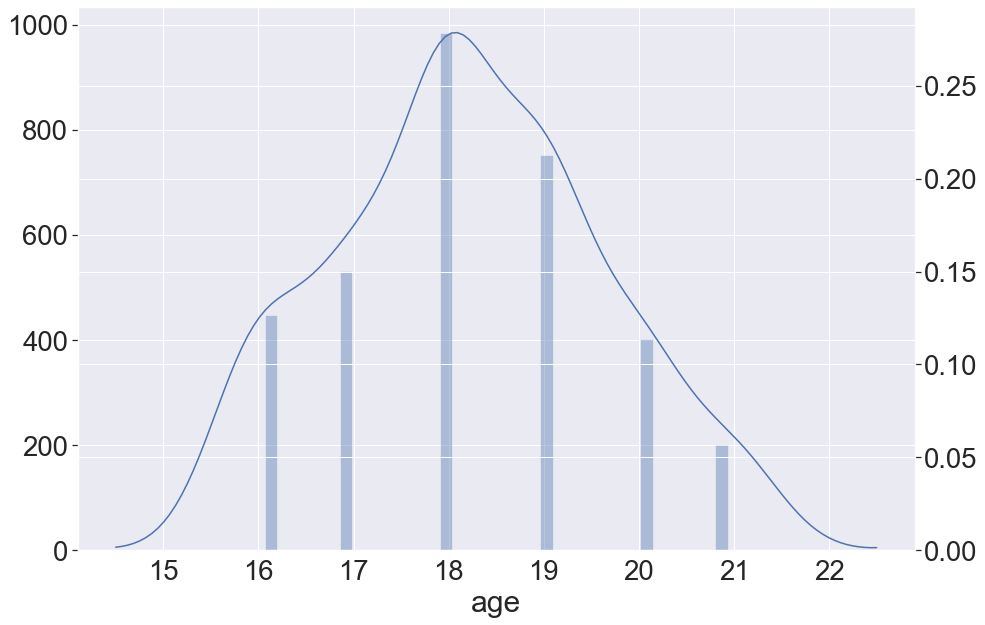

In [18]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
sns.distplot(g.age, kde=False, ax=ax1, hist_kws={'rwidth': 0.5})
sns.distplot(g.age, hist=False, ax=ax2, kde_kws={'bw': .5});

In [19]:
g.age.describe()

count    3319.000000
mean       18.219343
std         1.380603
min        16.000000
25%        17.000000
50%        18.000000
75%        19.000000
max        21.000000
Name: age, dtype: float64

### Age distribution: control group vs Polish population

Those data were used in my master thesis. The data are from 2017 as 2018 data were not available at the time of writing my master thesis. Now I have decided to use 2018 data as they become available.

GUS 2017 and 2018 data comparison is available in the [GUS_17_and_18](GUS_17_and_18.ipynb) notebook.

**Data 2018 source:** [Central Statistical Office in Poland, *Ludność. Stan i struktura oraz ruch naturalny w przekroju terytorialnym w 2018 r. Stan w dniu 31 XII*](https://stat.gov.pl/obszary-tematyczne/ludnosc/ludnosc/ludnosc-stan-i-struktura-oraz-ruch-naturalny-w-przekroju-terytorialnym-w-2018-r-stan-w-dniu-31-xii,6,25.html)


In [20]:
gus_2018_all = read_excel(
    "data/03_ludnosć_struktura wg wieku_RD'2019.xls",
    sheet_name="Tablica 15 ", index_col=0
)

In [21]:
gus_2018_all.iloc[[5, 6]]

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
WIEK \nAGE,Ogółem Total,Mężczyźni Males,Kobiety Females,Miasta Urban areas,NaN,NaN,Wieś Rural areas,NaN,NaN
NaN,NaN,NaN,NaN,razem total,mężczyźni males,kobiety females,razem total,mężczyźni males,kobiety females


In [22]:
gus_2018 = gus_2018_all.loc[range(16, 22)]

In [23]:
gus_2018 = gus_2018.reset_index()
gus_2018.columns = (
    'age total males females city_total city_males '
    'city_females rural_total rural_male rural_female'
).split()
gus_2018.head(2)

,age,total,males,females,city_total,city_males,city_females,rural_total,rural_male,rural_female
0,16,353738,181515,172223,195234,99504,95730,158504,82011,76493
1,17,366102,187690,178412,201651,102767,98884,164451,84923,79528


In [24]:
gus_age = np.repeat(gus_2018.age, gus_2018.total)
gus_age

0    16
0    16
0    16
0    16
0    16
     ..
5    21
5    21
5    21
5    21
5    21
Name: age, Length: 2270127, dtype: int64

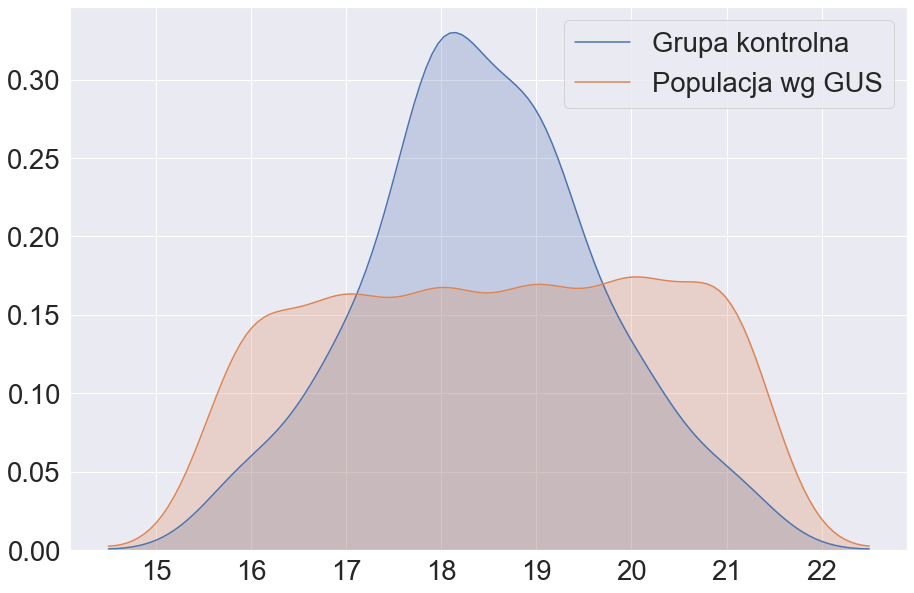

In [25]:
sns.kdeplot(g[~g.is_polish_scout].age, bw=.5, label="Grupa kontrolna", shade=True)
sns.kdeplot(gus_age, bw=.5, label="Populacja wg GUS", shade=True);

Age distribution for all participants was not normal - Shapiro test

In [26]:
stats.shapiro(g.age)

(0.9334813356399536, 3.791000132388868e-36)

### Age distribution: scouts vs control group

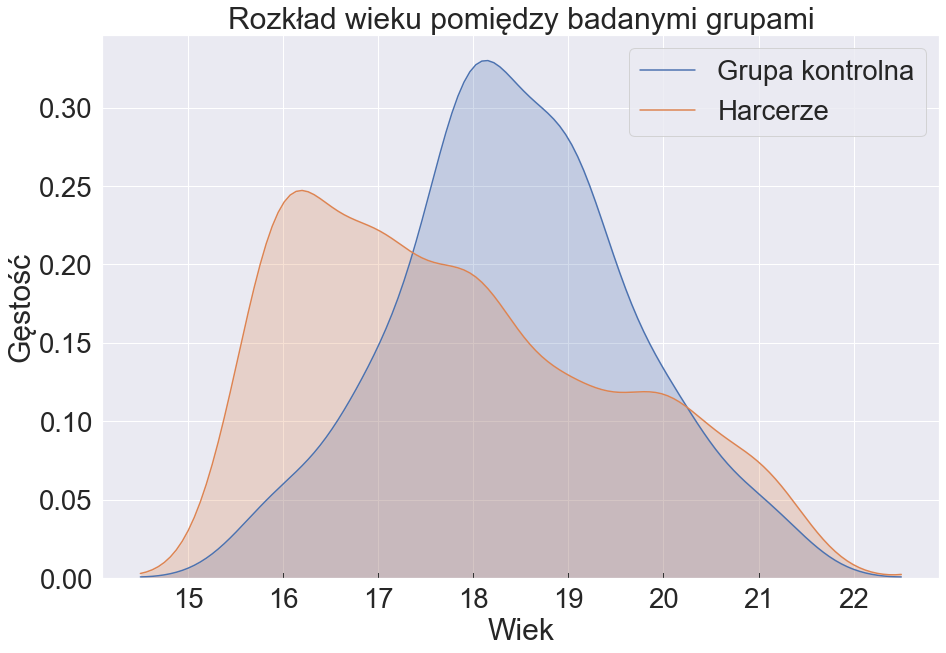

In [27]:
theme()
sns.kdeplot(g[g.is_polish_scout == False].age, bw=.5, label="Grupa kontrolna", shade=True)
sns.kdeplot(g[g.is_polish_scout].age, bw=.5, label="Harcerze", shade=True)
sns.rugplot(g['age'], color='.2', height=0.01)
labels(title='Rozkład wieku pomiędzy badanymi grupami', x='Wiek', y='Gęstość', legend=True)
theme()

ks test sprawdza czy dystrybucje są takie same, im bliżej zera tym większa szansa, że są podobne, im mniejsze pvalue tym bardziej istotne statystycznej

`ks_2samp` p-value is computed more precisely since SciPy 1.3.0 ([stats.ks_2samp changes log](https://docs.scipy.org/doc/scipy/reference/release.1.3.0.html#scipy-stats-improvements)) - see difference in p-value below:

In [28]:
# old
stats.ks_2samp(g[g.is_polish_scout].age, g[g.is_polish_scout == False].age, mode='asymp')

Ks_2sampResult(statistic=0.2992926102657606, pvalue=4.683722255842662e-60)

In [29]:
# new
stats.ks_2samp(g[g.is_polish_scout].age, g[g.is_polish_scout == False].age)

Ks_2sampResult(statistic=0.2992926102657606, pvalue=5.551115123125783e-16)

z-score = miara efektu, czyli jak ważne

In [30]:
stats.skewtest(g[g.is_polish_scout].age)

SkewtestResult(statistic=6.7585395407830315, pvalue=1.3938961157405241e-11)

In [31]:
stats.skewtest(g[g.is_polish_scout == False].age)

SkewtestResult(statistic=1.3572999517941522, pvalue=0.17468592265769778)

`scipy.stats.skew`

>For normally distributed data, the skewness should be about 0. A skewness value > 0 means that there is more weight in the left tail of the distribution. The function skewtest can be used to determine if the skewness value is close enough to 0, statistically speaking.

> Returns: The skewness of values along an axis, returning 0 where all values are equal.

Source: [SciPy docs](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.skew.html)

In [32]:
stats.skew(g[g.is_polish_scout].age)

0.5014823676852891

In [33]:
stats.shapiro(g[g.is_polish_scout].age)

(0.8864706754684448, 8.602735449645398e-29)

In [34]:
stats.shapiro(g[g.is_polish_scout == False].age)

(0.9303357601165771, 2.477462865996439e-30)

### Sex distribution comparison

Female to male ratio from GUS 2018 data

In [35]:
t = gus_2018[['males', 'females']].apply(sum)
female_male_ratio_gus = t['females'] / t['males']
female_male_ratio_gus

0.9525018147790097

Female to male ratio according to ZHP 2018 data

Data: http://hib.zhp.pl/zhp-w-liczbach/

In my Master Thesis I used data from 2017 as 2018 was not available at that time.

`female_male_ratio_zhp = 1.44`

In [36]:
zhp_in_numbers = read_excel(
    "data/ZHP_zestawienie_2018.xlsx",
    sheet_name="zestawienie_2018-1", index_col=2
)
zhp_in_numbers.tail(2)

,Data zliczenia,Jednostka,l. ogółem,l. og. K,l. og. M,l. NS K,l. NS M,brak,Obiet. K,Obiet. M,...,HS K,HS M,Wędr K,Wędr M,Wędr/Inst K,Wędr/Inst M,Inst K,Inst M,Sen/Inst K,Sen/Inst M
Kod,,,,,,,,,,,,,,,,,,,,,
1080000000000,2018-01-01,CHORĄGIEW ZIEMI LUBUSKIEJ,2819,1625,1194,158,149,1973,140,100,...,245,179,127,82,155,139,274,241,90,77
Razem:,NaT,NaN,102886,61541,41345,1854,2086,73570,5079,3264,...,11679,7132,5626,3611,5798,4263,7309,5890,2425,1923


In [37]:
zhp_members_total = zhp_in_numbers.loc["Razem:"]
zhp_members_total.head(3)

Data zliczenia       NaT
Jednostka            NaN
l. ogółem         102886
Name: Razem:, dtype: object

In [38]:
zhp_females = zhp_members_total.loc["Wędr K"] + zhp_members_total.loc["Wędr/Inst K"]
zhp_males = zhp_members_total.loc["Wędr M"] + zhp_members_total.loc["Wędr/Inst M"]
zhp_female_male_ratio = zhp_females / zhp_males
zhp_female_male_ratio

1.4508509017018034